In [1]:
from keras.models import load_model
encoder = load_model('encoder_model.h5')

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [2]:
def c_img(image):
    image = cv2.resize(image, (64,64))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = np.expand_dims(image, 0)
    image = np.expand_dims(image, -1)
    image = image / 255.
    return image

In [23]:
def get_emb(image):
    face_emb = encoder.predict(image)
    print(type(face_emb))
    face_emb = face_emb.tolist()
    face_emb = face_emb[0]
    return face_emb

In [4]:
def crop_face(image):
    pass

In [5]:
from dlib import get_frontal_face_detector
def detect_faces(image):
    face_detector = get_frontal_face_detector()
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),x.right(), x.bottom()) for x in detected_faces]
    return face_frames

In [6]:
import cv2
img = cv2.imread('Timofey.jpg')
faces_coords = detect_faces(img)
faces = []
print(faces_coords)
img.shape

[(139, 254, 268, 383)]


(540, 387, 3)

In [7]:
for (left, top, right, bottom) in faces_coords:
    faces.append(img[top:bottom, left:right])
print(faces[0].shape)
cv2.imwrite('fghjk.png', faces[0])

(129, 129, 3)


True

Populating the interactive namespace from numpy and matplotlib


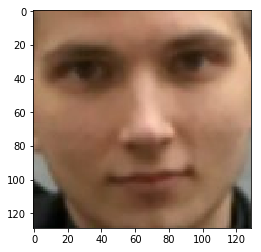

In [8]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('fghjk.png')
imgplot = plt.imshow(img)
plt.show()

In [9]:
from scipy.spatial import distance

In [10]:
img2 = cv2.imread('Mikhail.jpg')
faces_coords2 = detect_faces(img2)
print(faces_coords2)
new_faces = []
img2.shape

[(170, 420, 491, 741)]


(1080, 607, 3)

In [11]:
for (left, top, right, bottom) in faces_coords2:
    new_faces.append(img2[top:bottom, left:right])
print(new_faces[0].shape)
cv2.imwrite('fghjk2345.png', new_faces[0])

(321, 321, 3)


True

Populating the interactive namespace from numpy and matplotlib


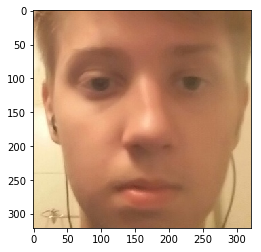

In [12]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('fghjk2345.png')
imgplot = plt.imshow(img)
plt.show()

In [13]:
from scipy.spatial import distance
emb1 = get_emb(c_img(faces[0]))
emb2 = get_emb(c_img(new_faces[0]))
print(emb1)
print('========')
print(emb2)

[0.12402127683162689, 0.1878933608531952, 0.07629968971014023, -0.10112522542476654, 0.5382866859436035, -0.07605135440826416, 0.9163192510604858, -0.9873977303504944, -0.2952827215194702, 0.09481702744960785, -0.10560969263315201, 0.5333579778671265, -0.4831286072731018, -0.42367085814476013, -0.16753484308719635, 3.2675414085388184, -1.0317649841308594, 0.335235595703125, -0.16179144382476807, -1.5806162357330322, -0.17619769275188446, 0.5030152201652527, -2.906221389770508, -0.5636253356933594, 0.16257593035697937, -0.2274440973997116, -4.8659138679504395, 1.007275104522705, 0.31396448612213135, 0.33360686898231506, 0.09738720208406448, 0.8133978843688965, 0.2274727076292038, 0.20075732469558716, 1.3012919425964355, -0.06627240777015686, 0.021238289773464203, -0.4428045153617859, 0.49778759479522705, -2.9540183544158936, -0.07064710557460785, -0.8934391736984253, 0.20066821575164795, 0.39513087272644043, 1.5451977252960205, -0.8530331254005432, -0.12519896030426025, -0.5792711377143

In [14]:
dist = distance.euclidean(emb1, emb2)
dist

9.00628195699117

In [15]:
img3 = cv2.imread('face1.jpg')
faces_coords3 = detect_faces(img3)
new_faces1 = []
#cv2.imshow('f',img3)
print(faces_coords3)
img.shape

[(204, 547, 589, 932)]


(321, 321, 3)

In [16]:
for (left, top, right, bottom) in faces_coords3:
    new_faces1.append(img3[top:bottom, left:right])
print(new_faces1[0].shape)
cv2.imwrite('fghjk2345334.png', new_faces1[0])

(385, 385, 3)


True

Populating the interactive namespace from numpy and matplotlib


/home/mikhail/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


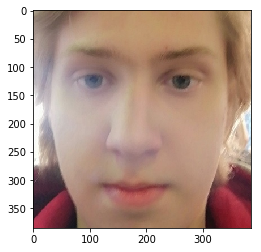

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('fghjk2345334.png')
imgplot = plt.imshow(img)
plt.show()

In [24]:
emb3 = get_emb(c_img(new_faces1[0]))

<class 'numpy.ndarray'>


In [20]:
print(distance.euclidean(emb2, emb3))
print(distance.euclidean(emb1, emb3))

7.369423208255275
8.992894447254582


In [27]:
import numpy as np
clear_enc1 = c_img(faces[0])
clear_enc2 = c_img(new_faces[0])
clear_enc3 = c_img(new_faces1[0])
clear_enc1 = encoder.predict(clear_enc1)
clear_enc2 = encoder.predict(clear_enc2)
clear_enc3 = encoder.predict(clear_enc3)
print(clear_enc1)
print(type(clear_enc1))
print(np.sum(np.square(clear_enc2 - clear_enc1)))
print(np.sum(np.square(clear_enc2 - clear_enc3)))

[[ 1.24021277e-01  1.87893361e-01  7.62996897e-02 -1.01125225e-01
   5.38286686e-01 -7.60513544e-02  9.16319251e-01 -9.87397730e-01
  -2.95282722e-01  9.48170274e-02 -1.05609693e-01  5.33357978e-01
  -4.83128607e-01 -4.23670858e-01 -1.67534843e-01  3.26754141e+00
  -1.03176498e+00  3.35235596e-01 -1.61791444e-01 -1.58061624e+00
  -1.76197693e-01  5.03015220e-01 -2.90622139e+00 -5.63625336e-01
   1.62575930e-01 -2.27444097e-01 -4.86591387e+00  1.00727510e+00
   3.13964486e-01  3.33606869e-01  9.73872021e-02  8.13397884e-01
   2.27472708e-01  2.00757325e-01  1.30129194e+00 -6.62724078e-02
   2.12382898e-02 -4.42804515e-01  4.97787595e-01 -2.95401835e+00
  -7.06471056e-02 -8.93439174e-01  2.00668216e-01  3.95130873e-01
   1.54519773e+00 -8.53033125e-01 -1.25198960e-01 -5.79271138e-01
   7.66028881e-01  7.12736785e-01 -4.99371946e-01 -9.64812785e-02
   4.85401228e-03 -4.93842900e-01 -6.22050464e-02 -4.10732403e-02
   4.38689137e+00 -1.18995655e+00 -1.56629252e+00  4.24584836e-01
  -1.39107